In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

# ÌïúÍ∏Ä Í∏ÄÍº¥Ï≤¥ Î≥ÄÍ≤Ω
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() Ïù¥Îü∞Í±∞ ÌñàÏùÑ Îïå, Ïª¨ÎüºÏù¥ ÏÉùÎûµÎêòÏßÄ ÏïäÍ≥†, Î™®Îì† Ïª¨Îüº Îú®Í≤å
pd.set_option('display.max_columns', None)
# ÏßÄÏàò ÌëúÍ∏∞Î≤ï ÎåÄÏã†Ïóê ÏÜåÏàòÏ†êÏúºÎ°ú ÌëúÏãúÌïòÎäîÏΩîÎìú
pd.options.display.float_format = '{:.2f}'.format
# Í∞í Í∏∏Ïù¥ Ï†úÌïú X
pd.set_option('display.max_colwidth', None) # Í∞í Í∏∏Ïù¥ Ï†úÌïú ÏóÜÏùå

01_15_LGHV_Modeling_afterFE.ipynb ÏóêÏÑúÏùò Î™®Îç∏ÎßÅÏùÑ ÌÜµÌï¥ ÎÇòÏò® Feature Importance Ïù¥Îã§.

üìä Feature Importance ÎπÑÍµê (2Ï∞®)

| ÏàúÏúÑ | Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä (ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ) | ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ (ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ) | XGBoost (ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ) | LightGBM (ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ) | CatBoost (ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ) | Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä (Í∞ÄÏ§ëÏπò) | LightGBM (Í∞ÄÏ§ëÏπò) |
|------|----------------------------------|----------------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| 1    | VOC_STOP_CANCEL_MONTH1_YN  | TOTAL_USED_DAYS                     | VOC_STOP_CANCEL_MONTH1_YN | MONTHS_REMAINING                   | MONTHS_REMAINING                 | VOC_STOP_CANCEL_MONTH1_YN | MONTHS_REMAINING               |
| 2    | CH_LAST_DAYS_BF_GRP                | MONTHS_REMAINING                 | CH_LAST_DAYS_BF_GRP               | TOTAL_USED_DAYS                       | VOC_STOP_CANCEL_MONTH1_YN | CH_LAST_DAYS_BF_GRP               | TOTAL_USED_DAYS                   |
| 3    | PAID_CHNL_CNT_GRP                  | CH_HH_AVG_MONTH1                 | CH_LAST_DAYS_FE                      | CH_LAST_DAYS_BF_GRP                 | CH_LAST_DAYS_BF_GRP                | PAID_CHNL_CNT_GRP                 | CH_LAST_DAYS_BF_GRP             |
| 4    | VOC_TOTAL_MONTH1_YN            | VOC_STOP_CANCEL_MONTH1_YN | VOC_TOTAL_MONTH1_YN            | CH_HH_AVG_MONTH1                  | TOTAL_USED_DAYS                       | TV_I_CNT                                  | AGE_GRP10                               |
| 5    | TV_I_CNT                                   | AGE_GRP10                                 | BUNDLE_YN                               | AGE_GRP10                                  | VOC_TOTAL_MONTH1_YN             | VOC_TOTAL_MONTH1_YN           | CH_HH_AVG_MONTH1                |
| 6    | BUNDLE_YN                               | VOC_TOTAL_MONTH1_YN            | MONTHS_REMAINING                 | INHOME_RATE                              | AGMT_END_SEG                           | BUNDLE_YN                              | TV_I_CNT                                  |
| 7    | CH_LAST_DAYS_FE                       | INHOME_RATE                            | MEDIA_NM_GRP                         | TV_I_CNT                                     | BUNDLE_YN                                 | CH_LAST_DAYS_FE                     | INHOME_RATE                           |
| 8    | AGMT_KIND_NM                         | CH_LAST_DAYS_BF_GRP               | TOTAL_USED_DAYS                     | SCRB_PATH_NM_GRP                    | INHOME_RATE                              | AGMT_KIND_NM                       | BUNDLE_YN                               |
| 9    | MEDIA_NM_GRP                         | SCRB_PATH_NM_GRP                   | AGMT_END_SEG                         | BUNDLE_YN                                 | AGE_GRP10                                   | MONTHS_REMAINING               | SCRB_PATH_NM_GRP                   |
| 10   | TOTAL_USED_DAYS                     | TV_I_CNT                                    | STB_RES_1M_YN                         | VOC_TOTAL_MONTH1_YN              | CH_HH_AVG_MONTH1                   | MEDIA_NM_GRP                        | VOC_TOTAL_MONTH1_YN            |
| 11   | MONTHS_REMAINING                  | PROD_NM_GRP                           | INHOME_RATE                           | AGMT_END_SEG                           | MEDIA_NM_GRP                            | INHOME_RATE                          | SVC_USE_DAYS_GRP                    |
| 12   | INHOME_RATE                            | AGMT_KIND_NM                         | PAID_CHNL_CNT_GRP                 | PROD_NM_GRP                            | TV_I_CNT                                      | AGE_GRP10                               | AGMT_END_SEG                         |
| 13   | AGE_GRP10                                 | AGMT_END_SEG                         | AGMT_KIND_NM                         | SVC_USE_DAYS_GRP                     | SCRB_PATH_NM_GRP                     | TOTAL_USED_DAYS                    | PROD_NM_GRP                          |
| 14   | AGMT_END_SEG_FE                     | SVC_USE_DAYS_GRP                    | AGE_GRP10                                 | MEDIA_NM_GRP                          | STB_RES_1M_YN                             | AGMT_END_SEG_FE                   | VOC_STOP_CANCEL_MONTH1_YN |
| 15   | AGMT_END_SEG                          | BUNDLE_YN                               | PROD_NM_GRP                           | AGMT_KIND_NM                         | AGMT_END_SEG_FE                        | AGMT_END_SEG                        | MEDIA_NM_GRP                         |
| 16   | SCRB_PATH_NM_GRP                   | CH_LAST_DAYS_FE                      | TV_I_CNT                                    | VOC_STOP_CANCEL_MONTH1_YN | PROD_NM_GRP                              | SCRB_PATH_NM_GRP                 | AGMT_KIND_NM                        |
| 17   | STB_RES_1M_YN                           | STB_RES_1M_YN                          | CH_HH_AVG_MONTH1                 | STB_RES_1M_YN                          | AGMT_KIND_NM                             | STB_RES_1M_YN                        | PAID_CHNL_CNT_GRP                 |
| 18   | KIDS_USE_YN                              | AGMT_END_SEG_FE                     | SCRB_PATH_NM_GRP                   | PAID_CHNL_CNT_GRP                 | SVC_USE_DAYS_GRP                        | KIDS_USE_YN                            | STB_RES_1M_YN                          |
| 19   | PROD_NM_GRP                           | MEDIA_NM_GRP                         | SVC_USE_DAYS_GRP                     | CONTENT_USE_YN                      | PAID_CHNL_CNT_GRP                     | PROD_NM_GRP                         | AGMT_END_SEG_FE                     |
| 20   | CH_HH_AVG_MONTH1                 | KIDS_USE_YN                             | CONTENT_USE_YN                       | AGMT_END_SEG_FE                     | CH_LAST_DAYS_FE                          | CH_HH_AVG_MONTH1                | CONTENT_USE_YN                      |
| 21   | CONTENT_USE_YN                       | PAID_CHNL_CNT_GRP                 | AGMT_END_SEG_FE                      | KIDS_USE_YN                             | CONTENT_USE_YN                          | CONTENT_USE_YN                     | KIDS_USE_YN                             |
| 22   | SVC_USE_DAYS_GRP                    | CONTENT_USE_YN                      | KIDS_USE_YN                              | CH_LAST_DAYS_FE                       | KIDS_USE_YN                                 | SVC_USE_DAYS_GRP                   | CH_LAST_DAYS_FE                      |

### ‚úÖ Feature Selection

#### üìå Feature Selection Í≥ºÏ†ï Î∞è 2Ï∞® Feature ÏÑ†Ï†ï

Ïù¥Î≤à Feature Selection Í≥ºÏ†ïÏóêÏÑúÎäî **7Í∞ÄÏßÄ Î™®Îç∏(Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä, ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏, XGBoost, LightGBM, CatBoost Îì±)Ïùò Feature Importance ÎπÑÍµê Í≤∞Í≥ºÎ•º Í∏∞Î∞ò**ÏúºÎ°ú **Í∞ÄÏû• ÏùòÎØ∏ ÏûàÎäî ÌîºÏ≤òÎì§ÏùÑ 2Ï∞®Ï†ÅÏúºÎ°ú ÏÑ†Ï†ï**ÌïòÎäî ÏûëÏóÖÏùÑ ÏßÑÌñâÌñàÏùå.

1Ô∏è. Î™®Îç∏Î≥Ñ Feature Importance ÎπÑÍµê
- Í∞Å Î™®Îç∏Ïùò Feature ImportanceÎ•º Î∂ÑÏÑùÌïòÏó¨ **Í≥µÌÜµÏ†ÅÏúºÎ°ú Ï§ëÏöîÌïòÍ≤å ÎÇòÌÉÄÎÇòÎäî ÌîºÏ≤ò**Î•º Ïö∞ÏÑ†Ï†ÅÏúºÎ°ú Í≥†Î†§Ìï®
- ÌäπÌûà, **Îã§ÏàòÏùò Î™®Îç∏ÏóêÏÑú ÏÉÅÏúÑÏóê Ìè¨Ìï®ÎêòÎäî ÌîºÏ≤ò**Îäî Ï§ëÏöîÌïú Î≥ÄÏàòÎ°ú ÌåêÎã®ÌïòÏó¨ Ïú†ÏßÄ

2Ô∏è. Ìï¥ÏÑù Í∞ÄÎä•ÏÑ±Í≥º ÎπÑÏ¶àÎãàÏä§Ï†Å ÏùòÎØ∏ Í≥†Î†§
- Feature ImportanceÍ∞Ä ÎÜíÎçîÎùºÎèÑ **ÎπÑÏ¶àÎãàÏä§Ï†ÅÏúºÎ°ú ÏùòÎØ∏Í∞Ä ÏóÜÎäî Î≥ÄÏàòÎäî Ï†úÏô∏**ÌïòÏòÄÏäµÎãàÎã§.
- ÏòàÎ•º Îì§Ïñ¥, **Ï¥ù ÏÇ¨Ïö©ÏùºÏàò(TOTAL_USED_DAYS)ÎÇò ÏßëÎèåÏù¥ ÏßÄÏàò(INHOME_RATE)** Í∞ôÏùÄ Î≥ÄÏàòÎäî  
  Í≥†Í∞ùÏùò ÏÑúÎπÑÏä§ Ïù¥Ïö© Ìå®ÌÑ¥Í≥º ÏßÅÏ†ëÏ†ÅÏù∏ Ïó∞Í¥ÄÏù¥ ÏûàÏñ¥ Ïú†ÏßÄ!!

3Ô∏è. Ï§ëÏöîÎèÑÍ∞Ä ÎÇÆÍ±∞ÎÇò, Ï§ëÎ≥µÎê† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ Î≥ÄÏàò Ï†úÍ±∞
- **Î™®Îì† Î™®Îç∏ÏóêÏÑú ÌïòÏúÑÍ∂å(15ÏúÑ Ïù¥Ìïò)Ïóê ÏúÑÏπòÌïòÎäî Î≥ÄÏàòÎì§ÏùÄ Ï†úÍ±∞**
- **ÏùòÎØ∏Í∞Ä Ïú†ÏÇ¨Ìïú Î≥ÄÏàò Ï§ë ÌïòÎÇòÎßå ÏÑ†ÌÉù**
  - Ïòà: `CH_LAST_DAYS_BF_GRP` vs. `CH_LAST_DAYS_FE` ‚Üí Îçî Ï§ëÏöîÌïú `CH_LAST_DAYS_BF_GRP`Îßå Ïú†ÏßÄ.

4Ô∏è. 2Ï∞® ÏÑ†Ï†ï ÌîºÏ≤ò Î¶¨Ïä§Ìä∏ ÌôïÏ†ï
- Îã§ÏñëÌïú Î™®Îç∏ÏóêÏÑú ÎÜíÏùÄ Ï§ëÏöîÎèÑÎ•º Î≥¥Ïù¥Î©∞, Ìï¥ÏßÄ ÏòàÏ∏°Í≥º Í¥ÄÎ†®ÏÑ±Ïù¥ ÎÜíÏùÄ **16Í∞úÏùò ÌîºÏ≤òÎ•º 2Ï∞®Ï†ÅÏúºÎ°ú ÏÑ†Ï†ï**
- **Î∂àÌïÑÏöîÌïú ÌîºÏ≤òÎ•º Ï†úÍ±∞ÌïòÏó¨ Î™®Îç∏Ïùò Î≥µÏû°ÎèÑÎ•º Ï§ÑÏù¥Í≥†, ÏÑ±Îä•ÏùÑ ÏµúÏ†ÅÌôî**ÌïòÎäî Í≤ÉÏùÑ Î™©ÌëúÎ°ú ÌïòÏòÄÏùå!

#### ‚úÖ 2Ï∞® ÏÑ†Ï†ïÎêú Features

| Feature |
|---------|
| `AGE_GRP10` |
| `AGMT_END_SEG` |
| `BUNDLE_YN` |
| `CH_HH_AVG_MONTH1` |
| `CH_LAST_DAYS_BF_GRP` |
| `CONTENT_USE_YN` |
| `INHOME_RATE` |
| `MEDIA_NM_GRP` |
| `MONTHS_REMAINING` |
| `SCRB_PATH_NM_GRP` |
| `STB_RES_1M_YN` |
| `SVC_USE_DAYS_GRP` |
| `TOTAL_USED_DAYS` |
| `TV_I_CNT` |
| `VOC_STOP_CANCEL_MONTH1_YN` |
| `VOC_TOTAL_MONTH1_YN` |

Ìï¥Îãπ FeatureÎì§ÏùÑ Í∞ÄÏßÄÍ≥† **Î™®Îç∏ÎßÅÏùÑ Ìïú Î≤à Îçî ÏßÑÌñâ!!**


---

In [3]:
df_real = pd.read_csv("data/full_data/TPS_cancel_data_FeatureEngineering_end.csv")

In [4]:
df_real.columns

Index(['sha2_hash', 'p_mt', 'SVC_USE_DAYS_GRP', 'MEDIA_NM_GRP', 'PROD_NM_GRP',
       'PROD_OLD_YN', 'PROD_ONE_PLUS_YN', 'AGMT_KIND_NM', 'STB_RES_1M_YN',
       'SVOD_SCRB_CNT_GRP', 'PAID_CHNL_CNT_GRP', 'SCRB_PATH_NM_GRP',
       'INHOME_RATE', 'AGMT_END_SEG', 'AGMT_END_YMD', 'TOTAL_USED_DAYS',
       'BUNDLE_YN', 'DIGITAL_GIGA_YN', 'DIGITAL_ALOG_YN', 'TV_I_CNT',
       'CH_LAST_DAYS_BF_GRP', 'VOC_TOTAL_MONTH1_YN',
       'VOC_STOP_CANCEL_MONTH1_YN', 'AGE_GRP10', 'EMAIL_RECV_CLS_NM',
       'SMS_SEND_CLS_NM', 'CH_HH_AVG_MONTH1', 'CH_FAV_RNK1',
       'KIDS_USE_PV_MONTH1', 'NFX_USE_YN', 'YTB_USE_YN', 'churn',
       'CH_25_RATIO_1MONTH', 'CONTENT_USE_YN', 'CH_LAST_DAYS_FE',
       'AGMT_END_SEG_FE', 'KIDS_USE_YN', 'MONTHS_REMAINING'],
      dtype='object')

In [5]:
# Ìï¥Îãπ Ïª¨ÎüºÎì§ Îì§Í≥†Ïò§Í∏∞

df = df_real.filter(items=['sha2_hash', 'AGE_GRP10', 'AGMT_END_SEG', 'BUNDLE_YN', 'CH_HH_AVG_MONTH1',
                           'CH_LAST_DAYS_BF_GRP', 'CONTENT_USE_YN', 'INHOME_RATE', 'MEDIA_NM_GRP', 
                           'MONTHS_REMAINING', 'SCRB_PATH_NM_GRP', 'STB_RES_1M_YN', 'SVC_USE_DAYS_GRP', 
                           'TOTAL_USED_DAYS', 'TV_I_CNT', 'VOC_STOP_CANCEL_MONTH1_YN', 'VOC_TOTAL_MONTH1_YN', 
                           'p_mt', 'churn'])

In [6]:
display(df)

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
21483374  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483375  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483376  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483377  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483378  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         AGE_GRP10  AGMT_END_SEG BUNDLE_YN  CH_HH_AVG_MONTH1  \
0              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              0.00   
1              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî         Y              6.72   
2              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî         Y              9.86   
3              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî         Y              5.95   
4              60ÎåÄ   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî         Y              4.03   
...            ...           ...       ...               ...   
21483374       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              2.03   
21483375       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              2.91   
21483376       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              1.97   
21483377       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              0.00   
21483378       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              0.00   

         CH_LAST_DAYS_BF_GRP CONTENT_USE_YN  INHOME_RATE MEDIA_NM_GRP  \
0                     3Í∞úÏõîÎÇ¥ÏóÜÏùå              N        10.00           HD   
1                       ÏùºÏ£ºÏùºÎÇ¥              N         0.00           HD   
2                       3Ï£ºÏùºÏ†Ñ              N        10.00           HD   
3                       4Ï£ºÏùºÏ†Ñ              N        10.00           HD   
4                       ÏùºÏ£ºÏùºÎÇ¥              N         0.00           HD   
...                      ...            ...          ...          ...   
21483374                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
21483375                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
21483376                2Ï£ºÏùºÏ†Ñ              N        10.00           HD   
21483377              3Í∞úÏõîÎÇ¥ÏóÜÏùå              N         0.00           HD   
21483378              3Í∞úÏõîÎÇ¥ÏóÜÏùå              N         0.00           HD   

          MONTHS_REMAINING SCRB_PATH_NM_GRP STB_RES_1M_YN SVC_USE_DAYS_GRP  \
0                       13              I/B             N      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå   
1                       12              I/B             Y     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
2                       11              I/B             N     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
3                       10              I/B             N     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
4                        9              I/B             N     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
...                    ...              ...           ...              ...   
21483374               -40             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483375               -41             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483376               -42             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483377               -43             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483378               -44             ÌòÑÏû•Í≤ΩÎ°ú             Y          36Í∞úÏõî Ïù¥ÏÉÅ   

          TOTAL_USED_DAYS  TV_I_CNT VOC_STOP_CANCEL_MONTH1_YN  \
0                     733      3.00                         N   
1          

In [7]:
df.columns

Index(['sha2_hash', 'AGE_GRP10', 'AGMT_END_SEG', 'BUNDLE_YN',
       'CH_HH_AVG_MONTH1', 'CH_LAST_DAYS_BF_GRP', 'CONTENT_USE_YN',
       'INHOME_RATE', 'MEDIA_NM_GRP', 'MONTHS_REMAINING', 'SCRB_PATH_NM_GRP',
       'STB_RES_1M_YN', 'SVC_USE_DAYS_GRP', 'TOTAL_USED_DAYS', 'TV_I_CNT',
       'VOC_STOP_CANCEL_MONTH1_YN', 'VOC_TOTAL_MONTH1_YN', 'p_mt', 'churn'],
      dtype='object')

---

### ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞Î°ú ÏßÑÌñâ
1. Î°úÏßÄÏä§Ìã±
2. ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏
3. XGB
4. LGBM
5. Cat

#### 1. LR ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞

In [8]:
# 2Ïõî ~ 9Ïõî train
# 11Ïõî test
train = df[df['p_mt'].isin([2,3,4,5,6,7,8,9])]
test = df[df['p_mt'] == 11]

In [9]:
display(train, test)

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
21483371  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483372  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483373  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483374  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483375  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         AGE_GRP10  AGMT_END_SEG BUNDLE_YN  CH_HH_AVG_MONTH1  \
0              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              0.00   
1              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî         Y              6.72   
2              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî         Y              9.86   
3              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî         Y              5.95   
4              60ÎåÄ   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî         Y              4.03   
...            ...           ...       ...               ...   
21483371       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              3.67   
21483372       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              3.14   
21483373       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              4.10   
21483374       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              2.03   
21483375       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              2.91   

         CH_LAST_DAYS_BF_GRP CONTENT_USE_YN  INHOME_RATE MEDIA_NM_GRP  \
0                     3Í∞úÏõîÎÇ¥ÏóÜÏùå              N        10.00           HD   
1                       ÏùºÏ£ºÏùºÎÇ¥              N         0.00           HD   
2                       3Ï£ºÏùºÏ†Ñ              N        10.00           HD   
3                       4Ï£ºÏùºÏ†Ñ              N        10.00           HD   
4                       ÏùºÏ£ºÏùºÎÇ¥              N         0.00           HD   
...                      ...            ...          ...          ...   
21483371                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
21483372                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
21483373                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
21483374                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
21483375                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   

          MONTHS_REMAINING SCRB_PATH_NM_GRP STB_RES_1M_YN SVC_USE_DAYS_GRP  \
0                       13              I/B             N      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå   
1                       12              I/B             Y     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
2                       11              I/B             N     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
3                       10              I/B             N     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
4                        9              I/B             N     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
...                    ...              ...           ...              ...   
21483371               -37             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483372               -38             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483373               -39             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483374               -40             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483375               -41             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   

          TOTAL_USED_DAYS  TV_I_CNT VOC_STOP_CANCEL_MONTH1_YN  \
0                     733      3.00                         N   
1            

sha2_hash  \
9         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
20        000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34   
31        0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858   
42        00001c363e8c833646a913c7566acd329523316f6a03afc0fe77dac7ca828d17   
53        00001f885d4d6c5ff6d01d5ebf1d6093d7f53c130de5fa3652dc0424d165b21c   
...                                                                    ...   
21483333  ffffdac172fec24c59aea00b7c6e53b8f9631e323cb99ada41a5fc7c38eaa74c   
21483344  ffffe2ae4b1bafe83133c187e7628932d4915bc7ee92457ac4b1b61e5362c3ba   
21483355  ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0   
21483366  ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df   
21483377  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         AGE_GRP10  AGMT_END_SEG BUNDLE_YN  CH_HH_AVG_MONTH1  \
9              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              6.23   
20             50ÎåÄ   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî         Y             15.37   
31             60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              1.47   
42             60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 9~12Í∞úÏõî         N              2.16   
53             50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         Y              1.64   
...            ...           ...       ...               ...   
21483333       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              0.00   
21483344       40ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         Y              1.81   
21483355       30ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              1.69   
21483366       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              3.39   
21483377       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              0.00   

         CH_LAST_DAYS_BF_GRP CONTENT_USE_YN  INHOME_RATE MEDIA_NM_GRP  \
9                       ÏùºÏ£ºÏùºÎÇ¥              N        20.00           HD   
20                      ÏùºÏ£ºÏùºÎÇ¥              N        70.00           HD   
31                      ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
42                      ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
53                      ÏùºÏ£ºÏùºÎÇ¥              N         0.00           HD   
...                      ...            ...          ...          ...   
21483333              3Í∞úÏõîÎÇ¥ÏóÜÏùå              N         0.00           HD   
21483344                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
21483355                ÏùºÏ£ºÏùºÎÇ¥              N         0.00           HD   
21483366                ÏùºÏ£ºÏùºÎÇ¥              N        20.00          UHD   
21483377              3Í∞úÏõîÎÇ¥ÏóÜÏùå              N         0.00           HD   

          MONTHS_REMAINING SCRB_PATH_NM_GRP STB_RES_1M_YN SVC_USE_DAYS_GRP  \
9                       33              I/B             N     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
20                       7              I/B             N     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
31                      20             ÏùºÎ∞òÏÉÅÎã¥             N          36Í∞úÏõî Ïù¥ÏÉÅ   
42                     -10             ÏùºÎ∞òÏÉÅÎã¥             N          36Í∞úÏõî Ïù¥ÏÉÅ   
53                     -51             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
...                    ...              ...           ...              ...   
21483333               -48             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483344               -39              O/B             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483355              -109             ÏùºÎ∞òÏÉÅÎã¥             N      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå   
21483366                19              I/B             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483377               -43             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   

          TOTAL_USED_DAYS  TV_I_CNT VOC_STOP_CANCEL_MONTH1_YN  \
9                    1008      3.00                         N   

In [10]:
display(train['churn'].value_counts(normalize=True) * 100)
display(train['churn'].value_counts())

churn
N   99.32
Y    0.68
Name: proportion, dtype: float64

churn
N    15541330
Y      105706
Name: count, dtype: int64

ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ

In [11]:
train

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
21483371  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483372  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483373  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483374  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483375  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         AGE_GRP10  AGMT_END_SEG BUNDLE_YN  CH_HH_AVG_MONTH1  \
0              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              0.00   
1              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî         Y              6.72   
2              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî         Y              9.86   
3              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî         Y              5.95   
4              60ÎåÄ   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî         Y              4.03   
...            ...           ...       ...               ...   
21483371       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              3.67   
21483372       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              3.14   
21483373       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              4.10   
21483374       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              2.03   
21483375       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              2.91   

         CH_LAST_DAYS_BF_GRP CONTENT_USE_YN  INHOME_RATE MEDIA_NM_GRP  \
0                     3Í∞úÏõîÎÇ¥ÏóÜÏùå              N        10.00           HD   
1                       ÏùºÏ£ºÏùºÎÇ¥              N         0.00           HD   
2                       3Ï£ºÏùºÏ†Ñ              N        10.00           HD   
3                       4Ï£ºÏùºÏ†Ñ              N        10.00           HD   
4                       ÏùºÏ£ºÏùºÎÇ¥              N         0.00           HD   
...                      ...            ...          ...          ...   
21483371                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
21483372                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
21483373                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
21483374                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
21483375                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   

          MONTHS_REMAINING SCRB_PATH_NM_GRP STB_RES_1M_YN SVC_USE_DAYS_GRP  \
0                       13              I/B             N      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå   
1                       12              I/B             Y     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
2                       11              I/B             N     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
3                       10              I/B             N     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
4                        9              I/B             N     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
...                    ...              ...           ...              ...   
21483371               -37             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483372               -38             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483373               -39             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483374               -40             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483375               -41             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   

          TOTAL_USED_DAYS  TV_I_CNT VOC_STOP_CANCEL_MONTH1_YN  \
0                     733      3.00                         N   
1            

In [12]:
train = train.drop(columns = ['sha2_hash','p_mt'])

In [13]:
# ÎûúÎç§ ÏãúÎìú 42Î°ú ÏÑ§Ï†ïÌïòÍ≥† ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ ÏßÑÌñâ
from imblearn.under_sampling import RandomUnderSampler

X = train.drop(columns = ['churn'])
y = train['churn']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [14]:
# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ churn Î∂ÑÌè¨!
print("ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Ï†Ñ:")
print(y.value_counts())

# ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ ÌõÑ, churn Î∂ÑÌè¨!
print("\nÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ ÌõÑ:")
print(pd.Series(y_resampled).value_counts())

ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Ï†Ñ:
churn
N    15541330
Y      105706
Name: count, dtype: int64

ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ ÌõÑ:
churn
N    105706
Y    105706
Name: count, dtype: int64


In [15]:
# y_resampledÏùò Ïù¥Î¶ÑÏùÑ churnÏúºÎ°ú Î™ÖÌôïÌïòÍ≤å ÏÑ§Ï†ï
y_resampled = pd.Series(y_resampled, name='churn')

# Í∑∏Î¶¨Í≥† X_resampledÏôÄ y_resampled Î≥ëÌï©
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [16]:
display(resampled_data)

AGE_GRP10  AGMT_END_SEG BUNDLE_YN  CH_HH_AVG_MONTH1  \
9584974        60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              5.89   
21276676       30ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         Y             10.47   
3206023        60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         N             10.28   
12989342       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              2.09   
17489377     90ÎåÄÏù¥ÏÉÅ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              0.33   
...            ...           ...       ...               ...   
21482271       60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              1.90   
21482420       30ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              0.00   
21482906       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              3.49   
21483095       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         N              0.62   
21483096       40ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              0.46   

         CH_LAST_DAYS_BF_GRP CONTENT_USE_YN  INHOME_RATE MEDIA_NM_GRP  \
9584974                 ÏùºÏ£ºÏùºÎÇ¥              N        30.00           HD   
21276676                ÏùºÏ£ºÏùºÎÇ¥              Y        50.00          UHD   
3206023                 ÏùºÏ£ºÏùºÎÇ¥              N        60.00           HD   
12989342                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
17489377                3Ï£ºÏùºÏ†Ñ              N         0.00           HD   
...                      ...            ...          ...          ...   
21482271                ÏùºÏ£ºÏùºÎÇ¥              N         0.00           HD   
21482420              3Í∞úÏõîÎÇ¥ÏóÜÏùå              N         0.00           HD   
21482906                ÏùºÏ£ºÏùºÎÇ¥              Y         0.00          UHD   
21483095                ÏùºÏ£ºÏùºÏ†Ñ              N         0.00           HD   
21483096                ÏùºÏ£ºÏùºÎÇ¥              N         0.00          UHD   

          MONTHS_REMAINING SCRB_PATH_NM_GRP STB_RES_1M_YN SVC_USE_DAYS_GRP  \
9584974                 17              O/B             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21276676               -40             ÏùºÎ∞òÏÉÅÎã¥             N       6Í∞úÏõî~12Í∞úÏõîÎØ∏Îßå   
3206023                 28              I/B             N       6Í∞úÏõî~12Í∞úÏõîÎØ∏Îßå   
12989342                20             ÏùºÎ∞òÏÉÅÎã¥             N          36Í∞úÏõî Ïù¥ÏÉÅ   
17489377                19              O/B             N      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå   
...                    ...              ...           ...              ...   
21482271                30             ÏùºÎ∞òÏÉÅÎã¥             Y          36Í∞úÏõî Ïù¥ÏÉÅ   
21482420                20              O/B             Y      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå   
21482906                36             ÌòÑÏû•Í≤ΩÎ°ú             Y            6Í∞úÏõîÎØ∏Îßå   
21483095                29             ÌòÑÏû•Í≤ΩÎ°ú             N       6Í∞úÏõî~12Í∞úÏõîÎØ∏Îßå   
21483096                36              O/B             N      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå   

          TOTAL_USED_DAYS  TV_I_CNT VOC_STOP_CANCEL_MONTH1_YN  \
9584974              2812      3.00                         N   
21276676             2326      2.00                         N   
3206023              3076      2.00                         N   
12989342             3807      2.00                         N   
17489377             3927      3.00                         N   
...                   ...       ...                       ...   
21482271             3712      2.00                         N   
21482420              501      2.00                         N   
21482906               11      2.00                         N   
21483095              231      1.00                         N   
21483096              370      2.00                         N   

         VOC_TOTAL_MONTH1_YN churn  
9584974                    N     N  
21276676                   N     N  
3206023                    N     N  
12989342                   N     N  
17489377                   Y    

In [17]:
train = resampled_data

Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏßÑÌñâ

In [18]:
display(train)
display(test)

AGE_GRP10  AGMT_END_SEG BUNDLE_YN  CH_HH_AVG_MONTH1  \
9584974        60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              5.89   
21276676       30ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         Y             10.47   
3206023        60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         N             10.28   
12989342       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              2.09   
17489377     90ÎåÄÏù¥ÏÉÅ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              0.33   
...            ...           ...       ...               ...   
21482271       60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              1.90   
21482420       30ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              0.00   
21482906       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              3.49   
21483095       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         N              0.62   
21483096       40ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              0.46   

         CH_LAST_DAYS_BF_GRP CONTENT_USE_YN  INHOME_RATE MEDIA_NM_GRP  \
9584974                 ÏùºÏ£ºÏùºÎÇ¥              N        30.00           HD   
21276676                ÏùºÏ£ºÏùºÎÇ¥              Y        50.00          UHD   
3206023                 ÏùºÏ£ºÏùºÎÇ¥              N        60.00           HD   
12989342                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
17489377                3Ï£ºÏùºÏ†Ñ              N         0.00           HD   
...                      ...            ...          ...          ...   
21482271                ÏùºÏ£ºÏùºÎÇ¥              N         0.00           HD   
21482420              3Í∞úÏõîÎÇ¥ÏóÜÏùå              N         0.00           HD   
21482906                ÏùºÏ£ºÏùºÎÇ¥              Y         0.00          UHD   
21483095                ÏùºÏ£ºÏùºÏ†Ñ              N         0.00           HD   
21483096                ÏùºÏ£ºÏùºÎÇ¥              N         0.00          UHD   

          MONTHS_REMAINING SCRB_PATH_NM_GRP STB_RES_1M_YN SVC_USE_DAYS_GRP  \
9584974                 17              O/B             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21276676               -40             ÏùºÎ∞òÏÉÅÎã¥             N       6Í∞úÏõî~12Í∞úÏõîÎØ∏Îßå   
3206023                 28              I/B             N       6Í∞úÏõî~12Í∞úÏõîÎØ∏Îßå   
12989342                20             ÏùºÎ∞òÏÉÅÎã¥             N          36Í∞úÏõî Ïù¥ÏÉÅ   
17489377                19              O/B             N      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå   
...                    ...              ...           ...              ...   
21482271                30             ÏùºÎ∞òÏÉÅÎã¥             Y          36Í∞úÏõî Ïù¥ÏÉÅ   
21482420                20              O/B             Y      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå   
21482906                36             ÌòÑÏû•Í≤ΩÎ°ú             Y            6Í∞úÏõîÎØ∏Îßå   
21483095                29             ÌòÑÏû•Í≤ΩÎ°ú             N       6Í∞úÏõî~12Í∞úÏõîÎØ∏Îßå   
21483096                36              O/B             N      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå   

          TOTAL_USED_DAYS  TV_I_CNT VOC_STOP_CANCEL_MONTH1_YN  \
9584974              2812      3.00                         N   
21276676             2326      2.00                         N   
3206023              3076      2.00                         N   
12989342             3807      2.00                         N   
17489377             3927      3.00                         N   
...                   ...       ...                       ...   
21482271             3712      2.00                         N   
21482420              501      2.00                         N   
21482906               11      2.00                         N   
21483095              231      1.00                         N   
21483096              370      2.00                         N   

         VOC_TOTAL_MONTH1_YN churn  
9584974                    N     N  
21276676                   N     N  
3206023                    N     N  
12989342                   N     N  
17489377                   Y    

sha2_hash  \
9         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
20        000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34   
31        0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858   
42        00001c363e8c833646a913c7566acd329523316f6a03afc0fe77dac7ca828d17   
53        00001f885d4d6c5ff6d01d5ebf1d6093d7f53c130de5fa3652dc0424d165b21c   
...                                                                    ...   
21483333  ffffdac172fec24c59aea00b7c6e53b8f9631e323cb99ada41a5fc7c38eaa74c   
21483344  ffffe2ae4b1bafe83133c187e7628932d4915bc7ee92457ac4b1b61e5362c3ba   
21483355  ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0   
21483366  ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df   
21483377  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         AGE_GRP10  AGMT_END_SEG BUNDLE_YN  CH_HH_AVG_MONTH1  \
9              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              6.23   
20             50ÎåÄ   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî         Y             15.37   
31             60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              1.47   
42             60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 9~12Í∞úÏõî         N              2.16   
53             50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         Y              1.64   
...            ...           ...       ...               ...   
21483333       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              0.00   
21483344       40ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         Y              1.81   
21483355       30ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              1.69   
21483366       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              3.39   
21483377       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              0.00   

         CH_LAST_DAYS_BF_GRP CONTENT_USE_YN  INHOME_RATE MEDIA_NM_GRP  \
9                       ÏùºÏ£ºÏùºÎÇ¥              N        20.00           HD   
20                      ÏùºÏ£ºÏùºÎÇ¥              N        70.00           HD   
31                      ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
42                      ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
53                      ÏùºÏ£ºÏùºÎÇ¥              N         0.00           HD   
...                      ...            ...          ...          ...   
21483333              3Í∞úÏõîÎÇ¥ÏóÜÏùå              N         0.00           HD   
21483344                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
21483355                ÏùºÏ£ºÏùºÎÇ¥              N         0.00           HD   
21483366                ÏùºÏ£ºÏùºÎÇ¥              N        20.00          UHD   
21483377              3Í∞úÏõîÎÇ¥ÏóÜÏùå              N         0.00           HD   

          MONTHS_REMAINING SCRB_PATH_NM_GRP STB_RES_1M_YN SVC_USE_DAYS_GRP  \
9                       33              I/B             N     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
20                       7              I/B             N     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
31                      20             ÏùºÎ∞òÏÉÅÎã¥             N          36Í∞úÏõî Ïù¥ÏÉÅ   
42                     -10             ÏùºÎ∞òÏÉÅÎã¥             N          36Í∞úÏõî Ïù¥ÏÉÅ   
53                     -51             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
...                    ...              ...           ...              ...   
21483333               -48             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483344               -39              O/B             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483355              -109             ÏùºÎ∞òÏÉÅÎã¥             N      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå   
21483366                19              I/B             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483377               -43             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   

          TOTAL_USED_DAYS  TV_I_CNT VOC_STOP_CANCEL_MONTH1_YN  \
9                    1008      3.00                         N   

In [19]:
# INHOME_RATE Ïª¨ÎüºÏùÄ objectÎ°ú

train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object


In [20]:
test = test.drop(columns=['sha2_hash','p_mt'])

In [21]:
from sklearn.preprocessing import LabelEncoder

train_and_test = pd.concat([train, test])

categorical_cols = train_and_test.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
  le = LabelEncoder()
  train_and_test[col] = le.fit_transform(train_and_test[col])
  label_encoders[col] = le

# Ïù∏ÏΩîÎî© ÌõÑ, Îã§Ïãú trainÍ≥º testÎ°ú Î∂ÑÎ¶¨

train = train_and_test.iloc[:len(train)].reset_index(drop=True)
test = train_and_test.iloc[len(train):].reset_index(drop=True)

print("Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù! üòÅ")

Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù! üòÅ


In [22]:
for col, le in label_encoders.items():
    print(f"üîπ {col} Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë")
    label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(label_mapping)
    print("-" * 30)

üîπ AGE_GRP10 Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'10ÎåÄ': 0, '20ÎåÄ': 1, '30ÎåÄ': 2, '40ÎåÄ': 3, '50ÎåÄ': 4, '60ÎåÄ': 5, '70ÎåÄ': 6, '80ÎåÄ': 7, '90ÎåÄÏù¥ÏÉÅ': 8, 'Ïó∞Î†πÏóÜÏùå': 9}
------------------------------
üîπ AGMT_END_SEG Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'ÏïΩÏ†ïÎßåÎ£å 1Í∞úÏõî': 0, 'ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ': 1, 'ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 1~2Í∞úÏõî': 2, 'ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 1Í∞úÏõî': 3, 'ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 2~3Í∞úÏõî': 4, 'ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 3~6Í∞úÏõî': 5, 'ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî': 6, 'ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî': 7, 'ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ': 8, 'ÏïΩÏ†ïÎßåÎ£åÌõÑ 1Í∞úÏõî~2Í∞úÏõî': 9, 'ÏïΩÏ†ïÎßåÎ£åÌõÑ 2Í∞úÏõî~3Í∞úÏõî': 10, 'ÏïΩÏ†ïÎßåÎ£åÌõÑ 3~6Í∞úÏõî': 11, 'ÏïΩÏ†ïÎßåÎ£åÌõÑ 6~9Í∞úÏõî': 12, 'ÏïΩÏ†ïÎßåÎ£åÌõÑ 9~12Í∞úÏõî': 13}
------------------------------
üîπ BUNDLE_YN Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'N': 0, 'Y': 1}
------------------------------
üîπ CH_LAST_DAYS_BF_GRP Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'2Ï£ºÏùºÏ†Ñ': 0, '3Í∞úÏõîÎÇ¥ÏóÜÏùå': 1, '3Ï£ºÏùºÏ†Ñ': 2, '4Ï£ºÏùºÏ†Ñ': 3, 'ÏùºÏ£ºÏùºÎÇ¥': 4, 'ÏùºÏ£ºÏùºÏ

In [23]:
display(train)
display(test)

AGE_GRP10  AGMT_END_SEG  BUNDLE_YN  CH_HH_AVG_MONTH1  \
0               5             1          1              5.89   
1               2             8          1             10.47   
2               5             1          0             10.28   
3               4             1          1              2.09   
4               8             1          1              0.33   
...           ...           ...        ...               ...   
211407          5             1          1              1.90   
211408          2             1          1              0.00   
211409          4             1          1              3.49   
211410          4             1          0              0.62   
211411          3             1          1              0.46   

        CH_LAST_DAYS_BF_GRP  CONTENT_USE_YN  INHOME_RATE  MEDIA_NM_GRP  \
0                         4               0            4             0   
1                         4               1            6             1   
2                         4               0            7             0   
3                         4               0            1             0   
4                         2               0            0             0   
...                     ...             ...          ...           ...   
211407                    4               0            0             0   
211408                    1               0            0             0   
211409                    4               1            0             1   
211410                    5               0            0             0   
211411                    4               0            0             1   

        MONTHS_REMAINING  SCRB_PATH_NM_GRP  STB_RES_1M_YN  SVC_USE_DAYS_GRP  \
0                     17                 1              0                 2   
1                    -40                 4              0                 3   
2                     28                 0              0                 3   
3                     20                 4              0                 2   
4                     19                 1              0                 0   
...                  ...               ...            ...               ...   
211407                30                 4              1                 2   
211408                20                 1              1                 0   
211409                36                 9              1                 4   
211410                29                 9              0                 3   
211411                36                 1              0                 0   

        TOTAL_USED_DAYS  TV_I_CNT  VOC_STOP_CANCEL_MONTH1_YN  \
0                  2812      3.00                          0   
1                  2326      2.00                          0   
2                  3076      2.00                          0   
3                  3807      2.00                          0   
4                  3927      3.00                          0   
...                 ...       ...                        ...   
211407             3712      2.00                          0   
211408              501      2.00                          0   
211409               11      2.00                          0   
211410              231      1.00                          0   
211411              370      2.00                          0   

        VOC_TOTAL_MONTH1_YN  churn  
0                         0      0  
1                         0      0  
2                         0      0  
3                         0      0  
4                         1      0  
...                     ...    ...  
211407                    0      1  
211408                    0      1  
211409                    1      1  
211410                    0      1  
211411                    0      1  

[211412 rows x 17 columns]

AGE_GRP10  AGMT_END_SEG  BUNDLE_YN  CH_HH_AVG_MONTH1  \
0                5             1          1              6.23   
1                4             6          1             15.37   
2                5             1          1              1.47   
3                5            13          0              2.16   
4                4             8          1              1.64   
...            ...           ...        ...               ...   
1945587          4             8          0              0.00   
1945588          3             8          1              1.81   
1945589          2             8          0              1.69   
1945590          4             1          1              3.39   
1945591          4             8          0              0.00   

         CH_LAST_DAYS_BF_GRP  CONTENT_USE_YN  INHOME_RATE  MEDIA_NM_GRP  \
0                          4               0            3             0   
1                          4               0            8             0   
2                          4               0            1             0   
3                          4               0            1             0   
4                          4               0            0             0   
...                      ...             ...          ...           ...   
1945587                    1               0            0             0   
1945588                    4               0            1             0   
1945589                    4               0            0             0   
1945590                    4               0            3             1   
1945591                    1               0            0             0   

         MONTHS_REMAINING  SCRB_PATH_NM_GRP  STB_RES_1M_YN  SVC_USE_DAYS_GRP  \
0                      33                 0              0                 1   
1                       7                 0              0                 1   
2                      20                 4              0                 2   
3                     -10                 4              0                 2   
4                     -51                 9              0                 2   
...                   ...               ...            ...               ...   
1945587               -48                 9              0                 2   
1945588               -39                 1              0                 2   
1945589              -109                 4              0                 0   
1945590                19                 0              0                 2   
1945591               -43                 9              0                 2   

         TOTAL_USED_DAYS  TV_I_CNT  VOC_STOP_CANCEL_MONTH1_YN  \
0                   1008      3.00                          0   
1                   4402      2.00                          0   
2                   2641      6.00                          0   
3                   1989      3.00                          0   
4                   3979      4.00                          0   
...                  ...       ...                        ...   
1945587             3599      2.00                          0   
1945588             2281      3.00                          0   
1945589             3958      2.00                          0   
1945590             1552      2.00                          0   
1945591             2429      1.00                          0   

         VOC_TOTAL_MONTH1_YN  churn  
0                          0      0  
1                          0      0  
2                          0      0  
3                          0      0  
4                          1      0  
...                      ...    ...  
1945587                    0      0  
1945588                    0      0  
1945589                    0      0  
1945590                    0      0  
1945591                    0      0  

[1945592 rows x 17 columns]

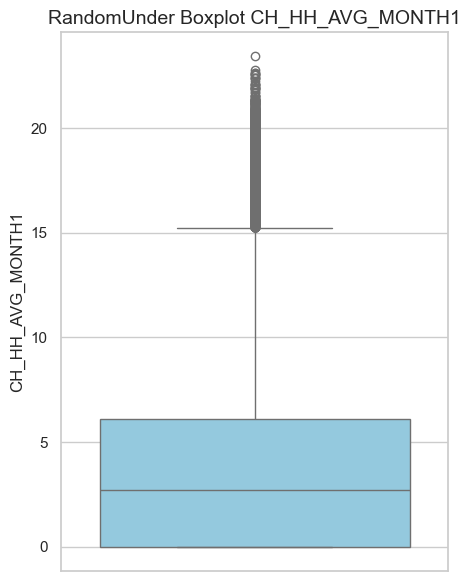

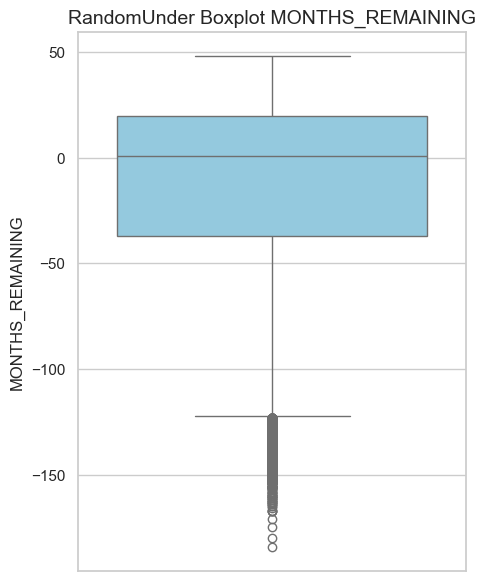

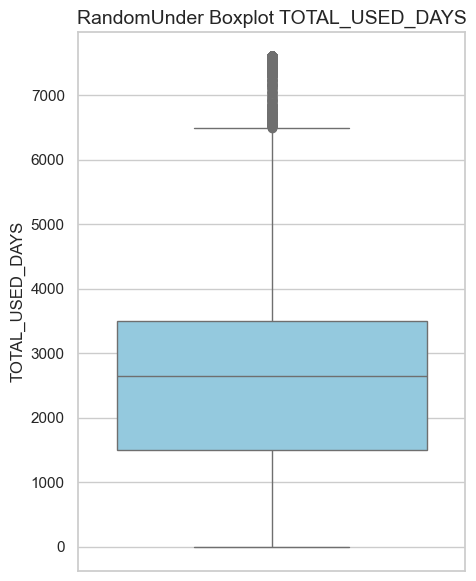

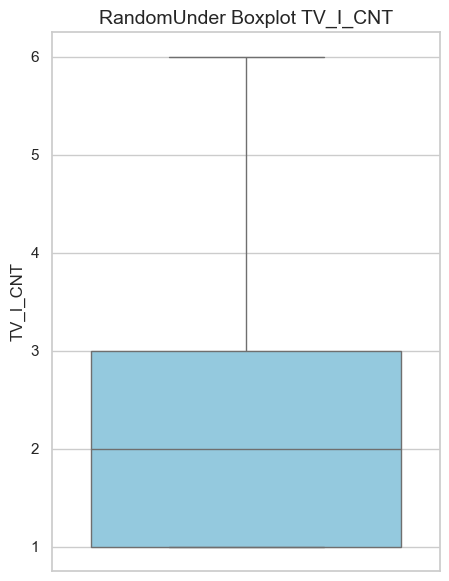

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# dfÏóêÏÑú Ïó∞ÏÜçÌòï(ÏàòÏπòÌòï) Î≥ÄÏàò Ï∞æÍ∏∞
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

sns.set(style="whitegrid")

# Í∞Å Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌï¥ boxplot
for col in numeric_columns:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=train[col], color="skyblue")

    plt.ylabel(col, fontsize=12)
    plt.title(f'RandomUnder Boxplot {col}', fontsize=14)

    plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# boxplotÏúºÎ°ú ÌôïÏù∏Ìïú robust Ïä§ÏºÄÏùºÎßÅ Ïª¨ÎüºÎì§
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'MONTHS_REMAINING']  # RobustScalerÎ•º Ï†ÅÏö©Ìï† Ïª¨Îüº
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # ÎÇòÎ®∏ÏßÄ Ïª¨Îüº

# Ïä§ÏºÄÏùºÎü¨ ÏÉùÏÑ±
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler Ï†ÅÏö©
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler Ï†ÅÏö©
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# Í≤∞Í≥º ÌôïÏù∏
print("robust, minmax ÎÅù")

robust, minmax ÎÅù


In [26]:
display(train, test)

AGE_GRP10  AGMT_END_SEG  BUNDLE_YN  CH_HH_AVG_MONTH1  \
0            0.50          0.08       1.00              0.52   
1            0.12          0.62       1.00              1.27   
2            0.50          0.08       0.00              1.24   
3            0.38          0.08       1.00             -0.10   
4            0.88          0.08       1.00             -0.39   
...           ...           ...        ...               ...   
211407       0.50          0.08       1.00             -0.13   
211408       0.12          0.08       1.00             -0.44   
211409       0.38          0.08       1.00              0.13   
211410       0.38          0.08       0.00             -0.34   
211411       0.25          0.08       1.00             -0.37   

        CH_LAST_DAYS_BF_GRP  CONTENT_USE_YN  INHOME_RATE  MEDIA_NM_GRP  \
0                      0.80            0.00         0.40          0.00   
1                      0.80            1.00         0.60          0.50   
2                      0.80            0.00         0.70          0.00   
3                      0.80            0.00         0.10          0.00   
4                      0.40            0.00         0.00          0.00   
...                     ...             ...          ...           ...   
211407                 0.80            0.00         0.00          0.00   
211408                 0.20            0.00         0.00          0.00   
211409                 0.80            1.00         0.00          0.50   
211410                 1.00            0.00         0.00          0.00   
211411                 0.80            0.00         0.00          0.50   

        MONTHS_REMAINING  SCRB_PATH_NM_GRP  STB_RES_1M_YN  SVC_USE_DAYS_GRP  \
0                   0.28              0.11           0.00              0.50   
1                  -0.72              0.44           0.00              0.75   
2                   0.47              0.00           0.00              0.75   
3                   0.33              0.44           0.00              0.50   
4                   0.32              0.11           0.00              0.00   
...                  ...               ...            ...               ...   
211407              0.51              0.44           1.00              0.50   
211408              0.33              0.11           1.00              0.00   
211409              0.61              1.00           1.00              1.00   
211410              0.49              1.00           0.00              0.75   
211411              0.61              0.11           0.00              0.00   

        TOTAL_USED_DAYS  TV_I_CNT  VOC_STOP_CANCEL_MONTH1_YN  \
0                  0.09      0.40                       0.00   
1                 -0.16      0.20                       0.00   
2                  0.22      0.20                       0.00   
3                  0.58      0.20                       0.00   
4                  0.64      0.40                       0.00   
...                 ...       ...                        ...   
211407             0.54      0.20                       0.00   
211408            -1.07      0.20                       0.00   
211409            -1.32      0.20                       0.00   
211410            -1.21      0.00                       0.00   
211411            -1.14      0.20                       0.00   

        VOC_TOTAL_MONTH1_YN  churn  
0                      0.00      0  
1                      0.00      0  
2                      0.00      0  
3                      0.00      0  
4                      1.00      0  
...                     ...    ...  
211407                 0.00      1  
211408                 0.00      1  
211409                 1.00      1  
211410                 0.00      1  
211411                 0.00      1  

[211412 rows x 17 columns]

AGE_GRP10  AGMT_END_SEG  BUNDLE_YN  CH_HH_AVG_MONTH1  \
0             0.50          0.08       1.00              0.58   
1             0.38          0.46       1.00              2.08   
2             0.50          0.08       1.00             -0.20   
3             0.50          1.00       0.00             -0.09   
4             0.38          0.62       1.00             -0.18   
...            ...           ...        ...               ...   
1945587       0.38          0.62       0.00             -0.44   
1945588       0.25          0.62       1.00             -0.15   
1945589       0.12          0.62       0.00             -0.17   
1945590       0.38          0.08       1.00              0.11   
1945591       0.38          0.62       0.00             -0.44   

         CH_LAST_DAYS_BF_GRP  CONTENT_USE_YN  INHOME_RATE  MEDIA_NM_GRP  \
0                       0.80            0.00         0.30          0.00   
1                       0.80            0.00         0.80          0.00   
2                       0.80            0.00         0.10          0.00   
3                       0.80            0.00         0.10          0.00   
4                       0.80            0.00         0.00          0.00   
...                      ...             ...          ...           ...   
1945587                 0.20            0.00         0.00          0.00   
1945588                 0.80            0.00         0.10          0.00   
1945589                 0.80            0.00         0.00          0.00   
1945590                 0.80            0.00         0.30          0.50   
1945591                 0.20            0.00         0.00          0.00   

         MONTHS_REMAINING  SCRB_PATH_NM_GRP  STB_RES_1M_YN  SVC_USE_DAYS_GRP  \
0                    0.56              0.00           0.00              0.25   
1                    0.11              0.00           0.00              0.25   
2                    0.33              0.44           0.00              0.50   
3                   -0.19              0.44           0.00              0.50   
4                   -0.91              1.00           0.00              0.50   
...                   ...               ...            ...               ...   
1945587             -0.86              1.00           0.00              0.50   
1945588             -0.70              0.11           0.00              0.50   
1945589             -1.93              0.44           0.00              0.00   
1945590              0.32              0.00           0.00              0.50   
1945591             -0.77              1.00           0.00              0.50   

         TOTAL_USED_DAYS  TV_I_CNT  VOC_STOP_CANCEL_MONTH1_YN  \
0                  -0.82      0.40                       0.00   
1                   0.88      0.20                       0.00   
2                  -0.00      1.00                       0.00   
3                  -0.33      0.40                       0.00   
4                   0.67      0.60                       0.00   
...                  ...       ...                        ...   
1945587             0.48      0.20                       0.00   
1945588            -0.18      0.40                       0.00   
1945589             0.66      0.20                       0.00   
1945590            -0.55      0.20                       0.00   
1945591            -0.11      0.00                       0.00   

         VOC_TOTAL_MONTH1_YN  churn  
0                       0.00      0  
1                       0.00      0  
2                       0.00      0  
3                       0.00      0  
4                       1.00      0  
...                      ...    ...  
1945587                 0.00      0  
1945588                 0.00      0  
1945589                 0.00      0  
1945590                 0.00      0  
1945591                 0.00      0  

[1945592 rows x 17 columns]

In [27]:
# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏßÑÌñâ

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ±
#
model = LogisticRegression(solver='liblinear', random_state=42)

# Î™®Îç∏ ÌïôÏäµ
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

Test Accuracy: 0.78

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.78      0.88   1932416
           1       0.02      0.69      0.04     13176

    accuracy                           0.78   1945592
   macro avg       0.51      0.74      0.46   1945592
weighted avg       0.99      0.78      0.87   1945592


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1511867  420549]
 [   4096    9080]]


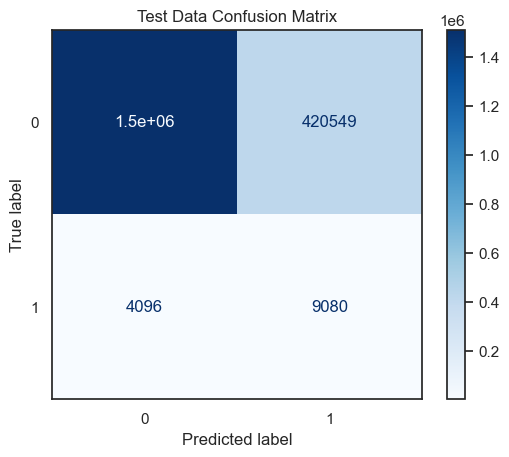

Test AUC-ROC: 0.81


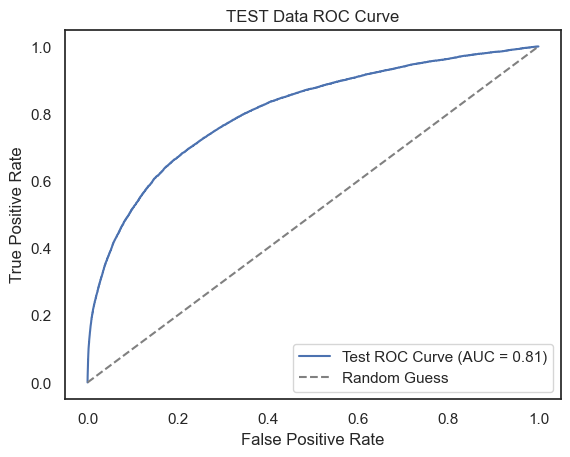

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

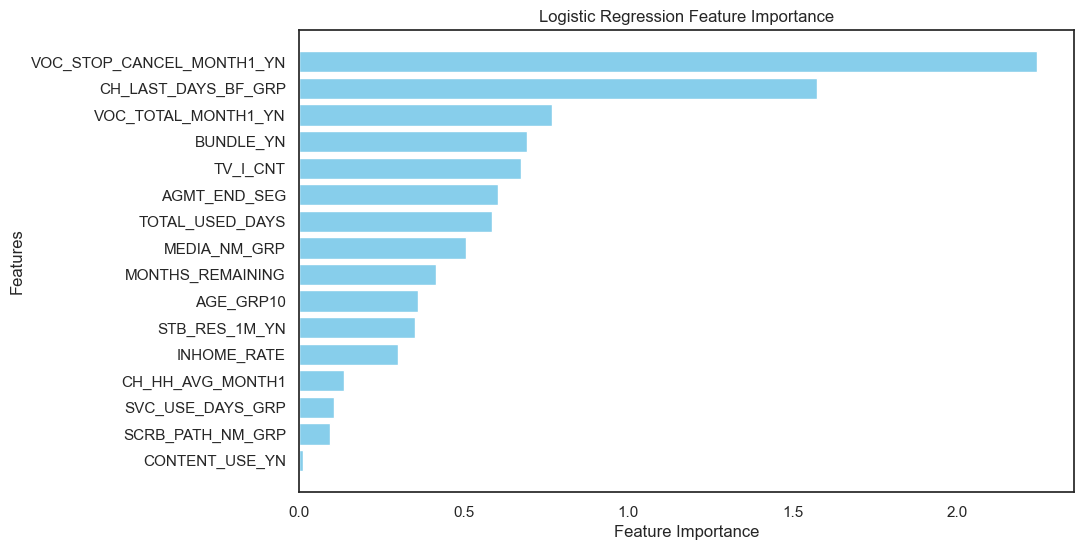

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Feature Importance Ï∂îÏ∂ú (Ï†àÎåìÍ∞í ÏÇ¨Ïö©)
feature_importance = np.abs(model.coef_[0])

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 2. ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ

In [31]:
X_train = train.drop(columns=['churn'])  # ÎèÖÎ¶Ω Î≥ÄÏàò
y_train = train['churn']  # Ï¢ÖÏÜç Î≥ÄÏàò

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏
rf_model = RandomForestClassifier(
    n_estimators=100,  # Ìä∏Î¶¨ Í∞úÏàò
    random_state=42
)

# Î™®Îç∏ ÌïôÏäµ
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Test Accuracy: 0.80

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.80      0.89   1932416
           1       0.02      0.70      0.05     13176

    accuracy                           0.80   1945592
   macro avg       0.51      0.75      0.47   1945592
weighted avg       0.99      0.80      0.88   1945592


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1545698  386718]
 [   3932    9244]]


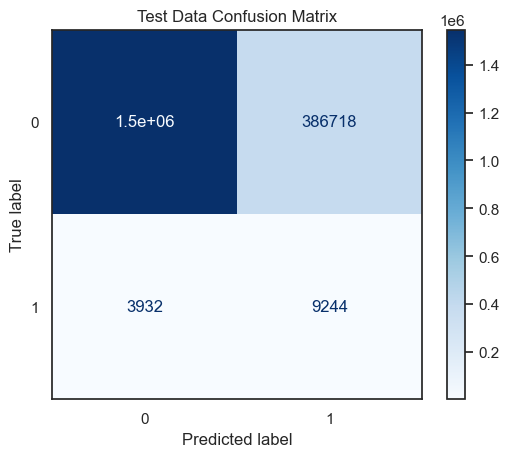

Test AUC-ROC: 0.82


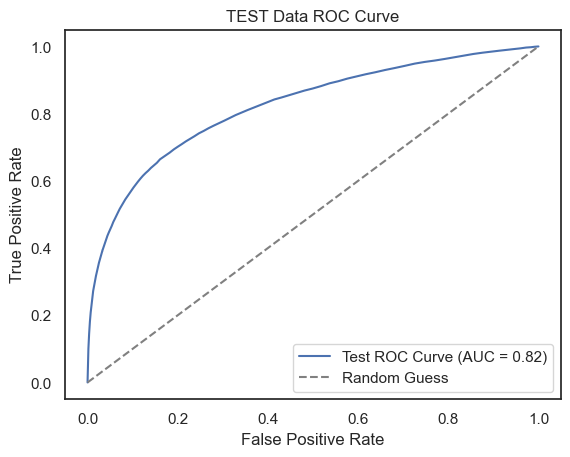

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = rf_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=rf_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = rf_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

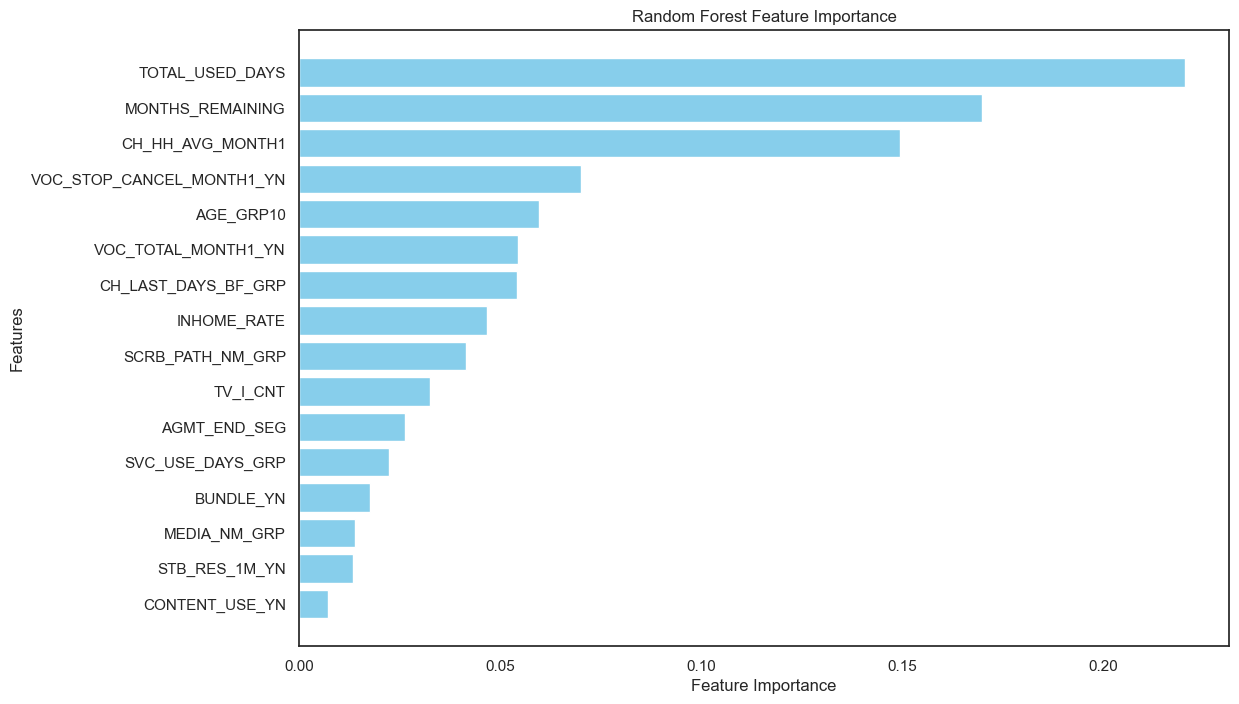

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 3. XGB ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ

In [36]:
from xgboost import XGBClassifier

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# XGBoost Î™®Îç∏ ÏÉùÏÑ±
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

# Î™®Îç∏ ÌïôÏäµ
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Test Accuracy: 0.81

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.81      0.90   1932416
           1       0.03      0.73      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.77      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1572110  360306]
 [   3497    9679]]


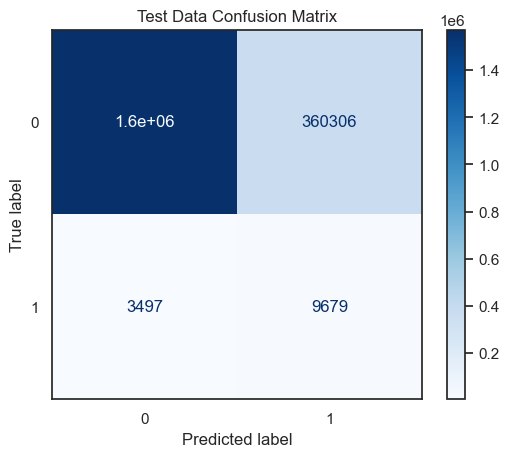

Test AUC-ROC: 0.85


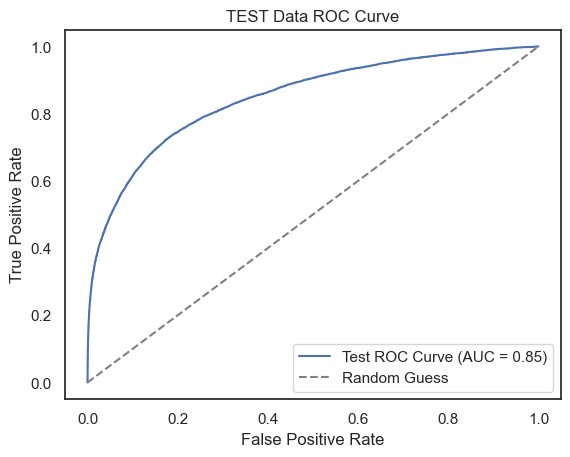

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = xgb_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=xgb_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = xgb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

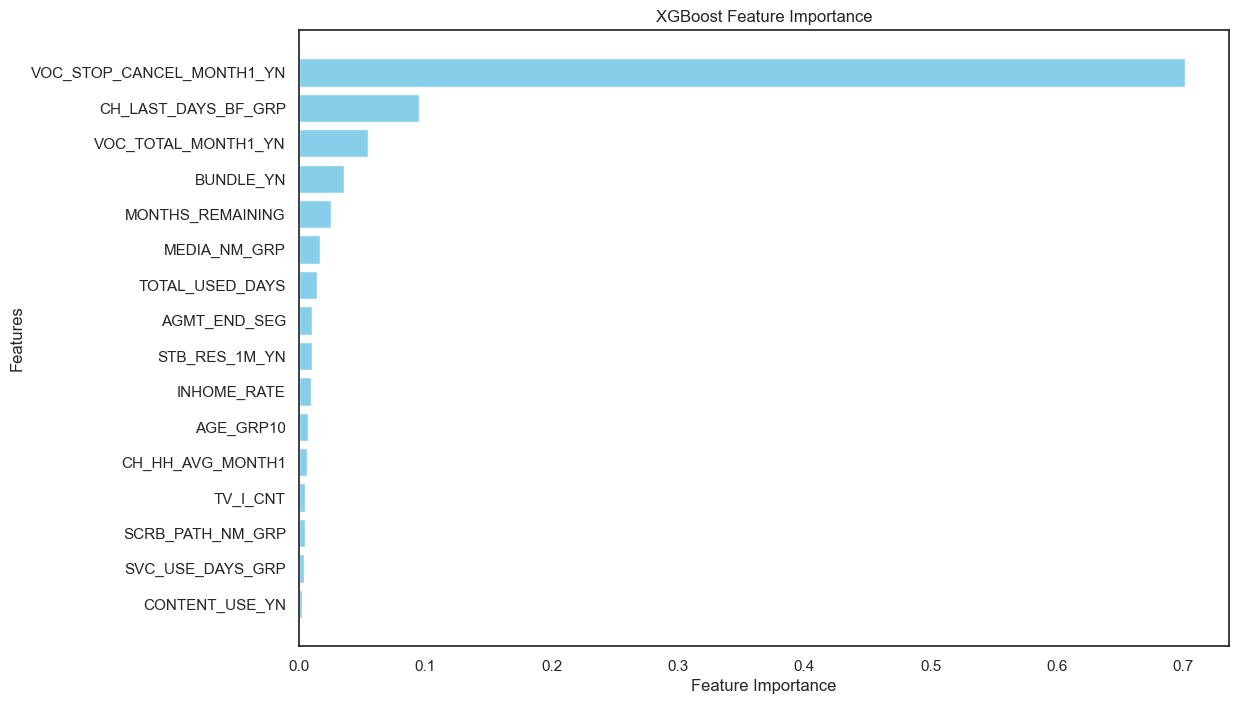

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# XGBoost Feature Importance Ï∂îÏ∂ú
feature_importance = xgb_model.feature_importances_

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 4. LGBM ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ

In [40]:
from lightgbm import LGBMClassifier

# ÎèÖÎ¶Ω Î≥ÄÏàò & Ï¢ÖÏÜç Î≥ÄÏàò ÏÑ§Ï†ï
X_train = train.drop(columns=['churn'])  # ÎèÖÎ¶Ω Î≥ÄÏàò
y_train = train['churn']  # Ï¢ÖÏÜç Î≥ÄÏàò

# LightGBM Î™®Îç∏ ÏÉùÏÑ±
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    random_state=42 
)

# Î™®Îç∏ ÌïôÏäµ
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=42)

Test Accuracy: 0.81

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932416
           1       0.03      0.74      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.77      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1559682  372734]
 [   3426    9750]]


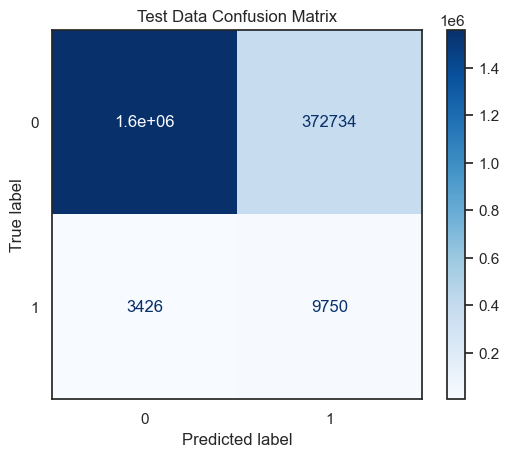

Test AUC-ROC: 0.85


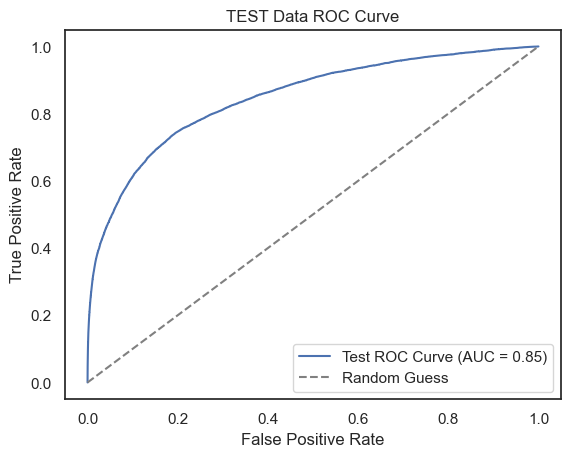

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = lgbm_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=lgbm_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = lgbm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

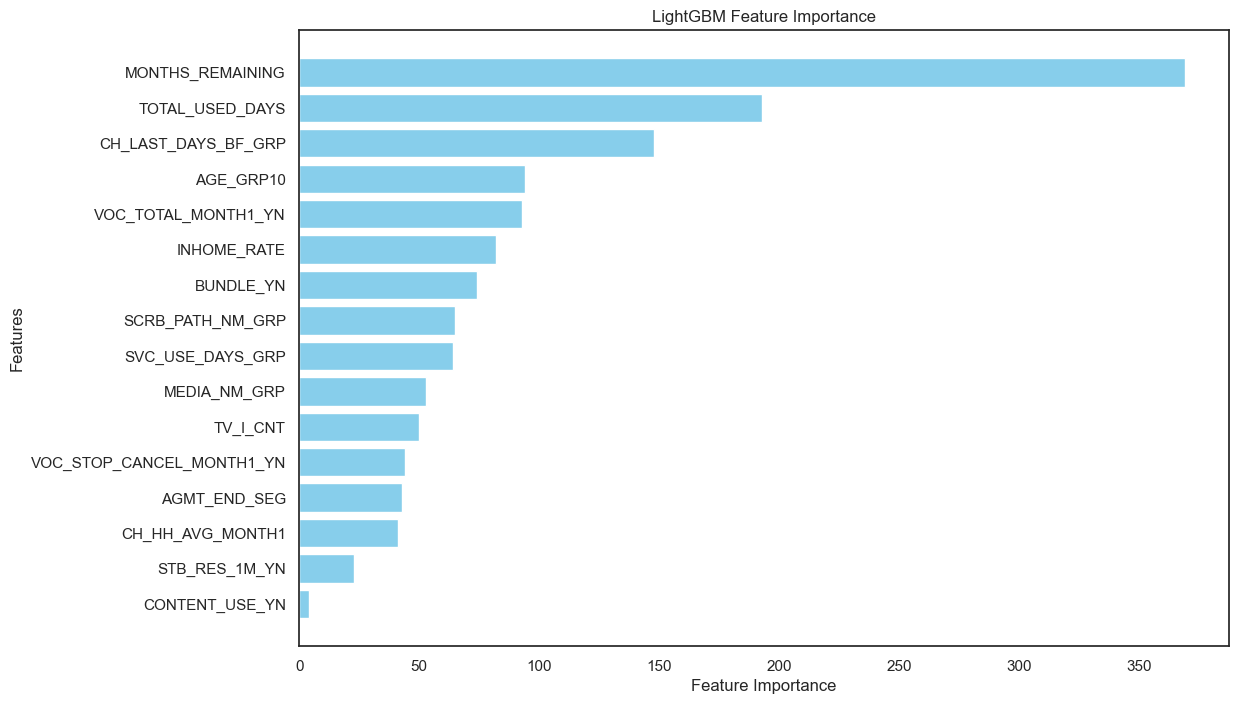

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance Ï∂îÏ∂ú
feature_importance = lgbm_model.feature_importances_

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 5. CatBoost ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ

In [47]:
from catboost import CatBoostClassifier

# ÎèÖÎ¶Ω Î≥ÄÏàò & Ï¢ÖÏÜç Î≥ÄÏàò ÏÑ§Ï†ï
X_train = train.drop(columns=['churn'])  # ÎèÖÎ¶Ω Î≥ÄÏàò
y_train = train['churn']  # Ï¢ÖÏÜç Î≥ÄÏàò

# Í∏∞Î≥∏Í∞íÏùÑ ÏÇ¨Ïö©Ìïú CatBoost Î™®Îç∏ ÏÉùÏÑ±
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    random_seed=42
)

# Î™®Îç∏ ÌïôÏäµ
cat_model.fit(X_train, y_train)

0:	learn: 0.6794788	total: 229ms	remaining: 3m 48s
1:	learn: 0.6668095	total: 314ms	remaining: 2m 36s
2:	learn: 0.6552712	total: 369ms	remaining: 2m 2s
3:	learn: 0.6447161	total: 409ms	remaining: 1m 41s
4:	learn: 0.6349589	total: 448ms	remaining: 1m 29s
5:	learn: 0.6261056	total: 495ms	remaining: 1m 21s
6:	learn: 0.6178039	total: 535ms	remaining: 1m 15s
7:	learn: 0.6100878	total: 570ms	remaining: 1m 10s
8:	learn: 0.6029820	total: 602ms	remaining: 1m 6s
9:	learn: 0.5963766	total: 633ms	remaining: 1m 2s
10:	learn: 0.5903718	total: 670ms	remaining: 1m
11:	learn: 0.5847364	total: 706ms	remaining: 58.1s
12:	learn: 0.5795156	total: 798ms	remaining: 1m
13:	learn: 0.5748875	total: 847ms	remaining: 59.6s
14:	learn: 0.5703906	total: 925ms	remaining: 1m
15:	learn: 0.5664086	total: 973ms	remaining: 59.8s
16:	learn: 0.5625840	total: 1.02s	remaining: 59s
17:	learn: 0.5593923	total: 1.06s	remaining: 58s
18:	learn: 0.5562143	total: 1.1s	remaining: 56.6s
19:	learn: 0.5530379	total: 1.13s	remaining: 55.

Test Accuracy: 0.81

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932416
           1       0.03      0.74      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.77      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1565707  366709]
 [   3438    9738]]


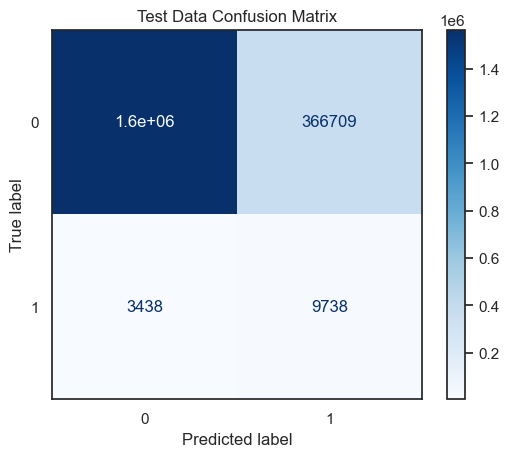

Test AUC-ROC: 0.85


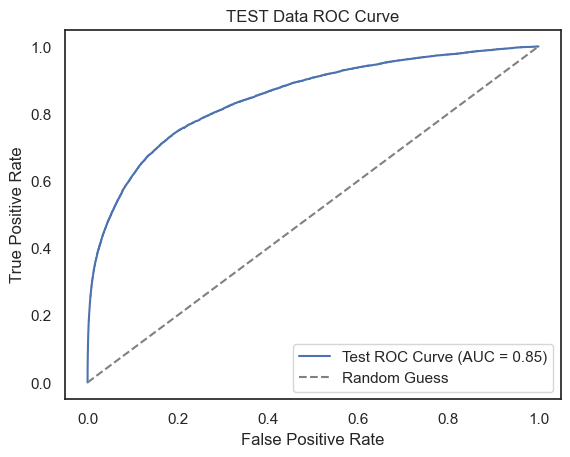

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = cat_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=cat_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = cat_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

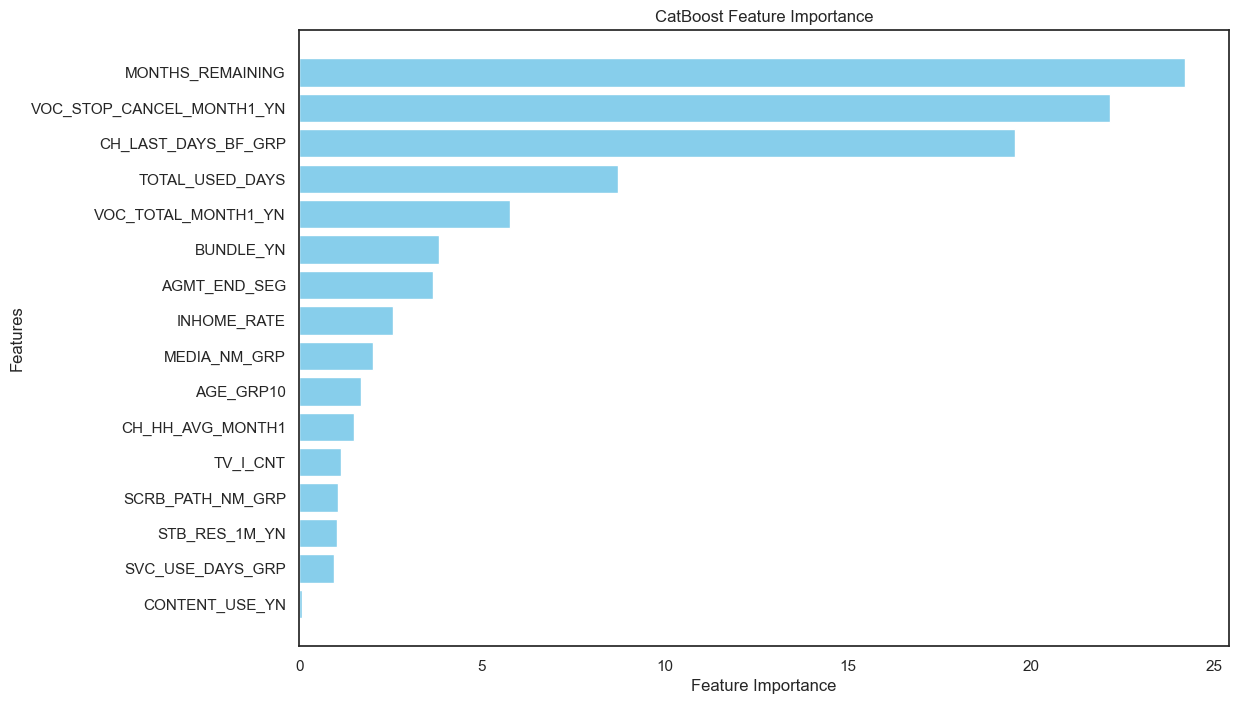

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# CatBoost Feature Importance Ï∂îÏ∂ú
feature_importance = cat_model.get_feature_importance()

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("CatBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()


---

### Í∞ÄÏ§ëÏπòÎ°ú ÏßÑÌñâ
1. Î°úÏßÄÏä§Ìã±
2. LGBM

#### 1. LR Í∞ÄÏ§ëÏπò

In [54]:
# Ìï¥Îãπ Ïª¨ÎüºÎì§ Îì§Í≥†Ïò§Í∏∞

df = df_real.filter(items=['sha2_hash', 'AGE_GRP10', 'AGMT_END_SEG', 'BUNDLE_YN', 'CH_HH_AVG_MONTH1',
                           'CH_LAST_DAYS_BF_GRP', 'CONTENT_USE_YN', 'INHOME_RATE', 'MEDIA_NM_GRP', 
                           'MONTHS_REMAINING', 'SCRB_PATH_NM_GRP', 'STB_RES_1M_YN', 'SVC_USE_DAYS_GRP', 
                           'TOTAL_USED_DAYS', 'TV_I_CNT', 'VOC_STOP_CANCEL_MONTH1_YN', 'VOC_TOTAL_MONTH1_YN', 
                           'p_mt', 'churn'])

In [56]:
display(df)

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
21483374  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483375  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483376  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483377  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483378  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         AGE_GRP10  AGMT_END_SEG BUNDLE_YN  CH_HH_AVG_MONTH1  \
0              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ         Y              0.00   
1              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî         Y              6.72   
2              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî         Y              9.86   
3              60ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî         Y              5.95   
4              60ÎåÄ   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî         Y              4.03   
...            ...           ...       ...               ...   
21483374       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              2.03   
21483375       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              2.91   
21483376       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              1.97   
21483377       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              0.00   
21483378       50ÎåÄ  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ         N              0.00   

         CH_LAST_DAYS_BF_GRP CONTENT_USE_YN  INHOME_RATE MEDIA_NM_GRP  \
0                     3Í∞úÏõîÎÇ¥ÏóÜÏùå              N        10.00           HD   
1                       ÏùºÏ£ºÏùºÎÇ¥              N         0.00           HD   
2                       3Ï£ºÏùºÏ†Ñ              N        10.00           HD   
3                       4Ï£ºÏùºÏ†Ñ              N        10.00           HD   
4                       ÏùºÏ£ºÏùºÎÇ¥              N         0.00           HD   
...                      ...            ...          ...          ...   
21483374                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
21483375                ÏùºÏ£ºÏùºÎÇ¥              N        10.00           HD   
21483376                2Ï£ºÏùºÏ†Ñ              N        10.00           HD   
21483377              3Í∞úÏõîÎÇ¥ÏóÜÏùå              N         0.00           HD   
21483378              3Í∞úÏõîÎÇ¥ÏóÜÏùå              N         0.00           HD   

          MONTHS_REMAINING SCRB_PATH_NM_GRP STB_RES_1M_YN SVC_USE_DAYS_GRP  \
0                       13              I/B             N      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå   
1                       12              I/B             Y     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
2                       11              I/B             N     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
3                       10              I/B             N     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
4                        9              I/B             N     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå   
...                    ...              ...           ...              ...   
21483374               -40             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483375               -41             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483376               -42             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483377               -43             ÌòÑÏû•Í≤ΩÎ°ú             N          36Í∞úÏõî Ïù¥ÏÉÅ   
21483378               -44             ÌòÑÏû•Í≤ΩÎ°ú             Y          36Í∞úÏõî Ïù¥ÏÉÅ   

          TOTAL_USED_DAYS  TV_I_CNT VOC_STOP_CANCEL_MONTH1_YN  \
0                     733      3.00                         N   
1          

In [57]:
train = df[df['p_mt'].isin([2,3,4,5,6,7,8,9])]
test = df[df['p_mt'] == 11]

In [58]:
train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object


In [59]:
train = train.drop(columns=['sha2_hash','p_mt'])
test = test.drop(columns=['sha2_hash','p_mt'])

In [61]:
from sklearn.preprocessing import LabelEncoder

train_and_test = pd.concat([train, test])

categorical_cols = train_and_test.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
  le = LabelEncoder()
  train_and_test[col] = le.fit_transform(train_and_test[col])
  label_encoders[col] = le

# Ïù∏ÏΩîÎî© ÌõÑ, Îã§Ïãú trainÍ≥º testÎ°ú Î∂ÑÎ¶¨

train = train_and_test.iloc[:len(train)].reset_index(drop=True)
test = train_and_test.iloc[len(train):].reset_index(drop=True)

print("Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù! üòÅ")

Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù! üòÅ


In [62]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# boxplotÏúºÎ°ú ÌôïÏù∏Ìïú robust Ïä§ÏºÄÏùºÎßÅ Ïª¨ÎüºÎì§
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'MONTHS_REMAINING']  # RobustScalerÎ•º Ï†ÅÏö©Ìï† Ïª¨Îüº
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # ÎÇòÎ®∏ÏßÄ Ïª¨Îüº

# Ïä§ÏºÄÏùºÎü¨ ÏÉùÏÑ±
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler Ï†ÅÏö©
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler Ï†ÅÏö©
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# Í≤∞Í≥º ÌôïÏù∏
print("robust, minmax ÎÅù")

robust, minmax ÎÅù


In [65]:
display(train, test)

AGE_GRP10  AGMT_END_SEG  BUNDLE_YN  CH_HH_AVG_MONTH1  \
0              0.56          0.08       1.00             -0.65   
1              0.56          0.54       1.00              0.50   
2              0.56          0.54       1.00              1.03   
3              0.56          0.54       1.00              0.37   
4              0.56          0.46       1.00              0.04   
...             ...           ...        ...               ...   
15647031       0.44          0.62       0.00             -0.02   
15647032       0.44          0.62       0.00             -0.11   
15647033       0.44          0.62       0.00              0.05   
15647034       0.44          0.62       0.00             -0.30   
15647035       0.44          0.62       0.00             -0.15   

          CH_LAST_DAYS_BF_GRP  CONTENT_USE_YN  INHOME_RATE  MEDIA_NM_GRP  \
0                        0.20            0.00         0.10          0.00   
1                        0.80            0.00         0.00          0.00   
2                        0.40            0.00         0.10          0.00   
3                        0.60            0.00         0.10          0.00   
4                        0.80            0.00         0.00          0.00   
...                       ...             ...          ...           ...   
15647031                 0.80            0.00         0.10          0.00   
15647032                 0.80            0.00         0.10          0.00   
15647033                 0.80            0.00         0.10          0.00   
15647034                 0.80            0.00         0.10          0.00   
15647035                 0.80            0.00         0.10          0.00   

          MONTHS_REMAINING  SCRB_PATH_NM_GRP  STB_RES_1M_YN  SVC_USE_DAYS_GRP  \
0                     0.08              0.00           0.00              0.00   
1                     0.07              0.00           1.00              0.25   
2                     0.05              0.00           0.00              0.25   
3                     0.03              0.00           0.00              0.25   
4                     0.02              0.00           0.00              0.25   
...                    ...               ...            ...               ...   
15647031             -0.75              1.00           0.00              0.50   
15647032             -0.77              1.00           0.00              0.50   
15647033             -0.78              1.00           0.00              0.50   
15647034             -0.80              1.00           0.00              0.50   
15647035             -0.82              1.00           0.00              0.50   

          TOTAL_USED_DAYS  TV_I_CNT  VOC_STOP_CANCEL_MONTH1_YN  \
0                   -1.41      0.40                       0.00   
1                   -1.39      0.40                       0.00   
2                   -1.37      0.40                       0.00   
3                   -1.35      0.40                       0.00   
4                   -1.33      0.40                       0.00   
...                   ...       ...                        ...   
15647031            -0.42      0.00                       0.00   
15647032            -0.40      0.00                       0.00   
15647033            -0.38      0.00                       0.00   
15647034            -0.36      0.00                       0.00   
15647035            -0.34      0.00                       0.00   

          VOC_TOTAL_MONTH1_YN  churn  
0                        0.00      0  
1                        1.00      0  
2                        0.00      0  
3                        0.00      0  
4                        0.00      0  
...                       ...    ...  
15647031                 0.00      0  
15647032                 0.00      0  
15647033                 0.00      0  
15647034                 0.00      0  
15647035                 0.00      0  

[15647036 rows x 17 columns]

AGE_GRP10  AGMT_END_SEG  BUNDLE_YN  CH_HH_AVG_MONTH1  \
0             0.56          0.08       1.00              0.41   
1             0.44          0.46       1.00              1.97   
2             0.56          0.08       1.00             -0.40   
3             0.56          1.00       0.00             -0.28   
4             0.44          0.62       1.00             -0.37   
...            ...           ...        ...               ...   
1945587       0.44          0.62       0.00             -0.65   
1945588       0.33          0.62       1.00             -0.34   
1945589       0.22          0.62       0.00             -0.36   
1945590       0.44          0.08       1.00             -0.07   
1945591       0.44          0.62       0.00             -0.65   

         CH_LAST_DAYS_BF_GRP  CONTENT_USE_YN  INHOME_RATE  MEDIA_NM_GRP  \
0                       0.80            0.00         0.30          0.00   
1                       0.80            0.00         0.80          0.00   
2                       0.80            0.00         0.10          0.00   
3                       0.80            0.00         0.10          0.00   
4                       0.80            0.00         0.00          0.00   
...                      ...             ...          ...           ...   
1945587                 0.20            0.00         0.00          0.00   
1945588                 0.80            0.00         0.10          0.00   
1945589                 0.80            0.00         0.00          0.00   
1945590                 0.80            0.00         0.30          0.50   
1945591                 0.20            0.00         0.00          0.00   

         MONTHS_REMAINING  SCRB_PATH_NM_GRP  STB_RES_1M_YN  SVC_USE_DAYS_GRP  \
0                    0.42              0.00           0.00              0.25   
1                   -0.02              0.00           0.00              0.25   
2                    0.20              0.44           0.00              0.50   
3                   -0.30              0.44           0.00              0.50   
4                   -0.98              1.00           0.00              0.50   
...                   ...               ...            ...               ...   
1945587             -0.93              1.00           0.00              0.50   
1945588             -0.78              0.11           0.00              0.50   
1945589             -1.95              0.44           0.00              0.00   
1945590              0.18              0.00           0.00              0.50   
1945591             -0.85              1.00           0.00              0.50   

         TOTAL_USED_DAYS  TV_I_CNT  VOC_STOP_CANCEL_MONTH1_YN  \
0                  -1.23      0.40                       0.00   
1                   1.00      0.20                       0.00   
2                  -0.16      1.00                       0.00   
3                  -0.58      0.40                       0.00   
4                   0.72      0.60                       0.00   
...                  ...       ...                        ...   
1945587             0.47      0.20                       0.00   
1945588            -0.39      0.40                       0.00   
1945589             0.70      0.20                       0.00   
1945590            -0.87      0.20                       0.00   
1945591            -0.30      0.00                       0.00   

         VOC_TOTAL_MONTH1_YN  churn  
0                       0.00      0  
1                       0.00      0  
2                       0.00      0  
3                       0.00      0  
4                       1.00      0  
...                      ...    ...  
1945587                 0.00      0  
1945588                 0.00      0  
1945589                 0.00      0  
1945590                 0.00      0  
1945591                 0.00      0  

[1945592 rows x 17 columns]

In [66]:
# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏßÑÌñâ

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ±
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Î™®Îç∏ ÌïôÏäµ
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

Test Accuracy: 0.78

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.78      0.88   1932416
           1       0.02      0.69      0.04     13176

    accuracy                           0.78   1945592
   macro avg       0.51      0.74      0.46   1945592
weighted avg       0.99      0.78      0.87   1945592


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1510413  422003]
 [   4093    9083]]


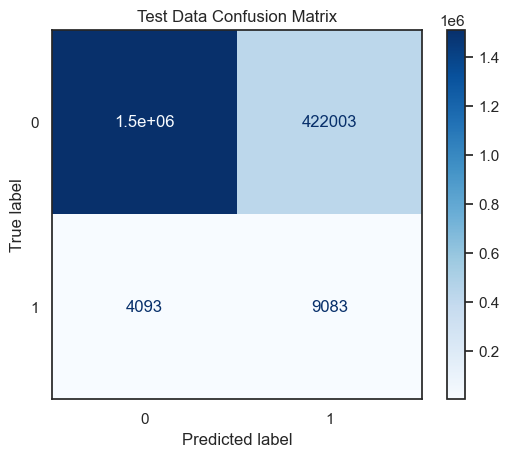

Test AUC-ROC: 0.81


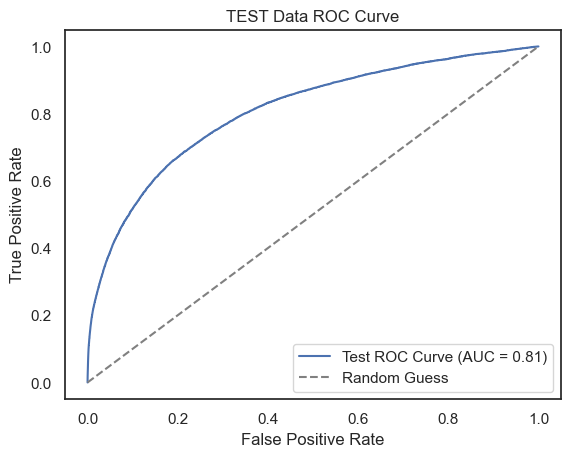

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

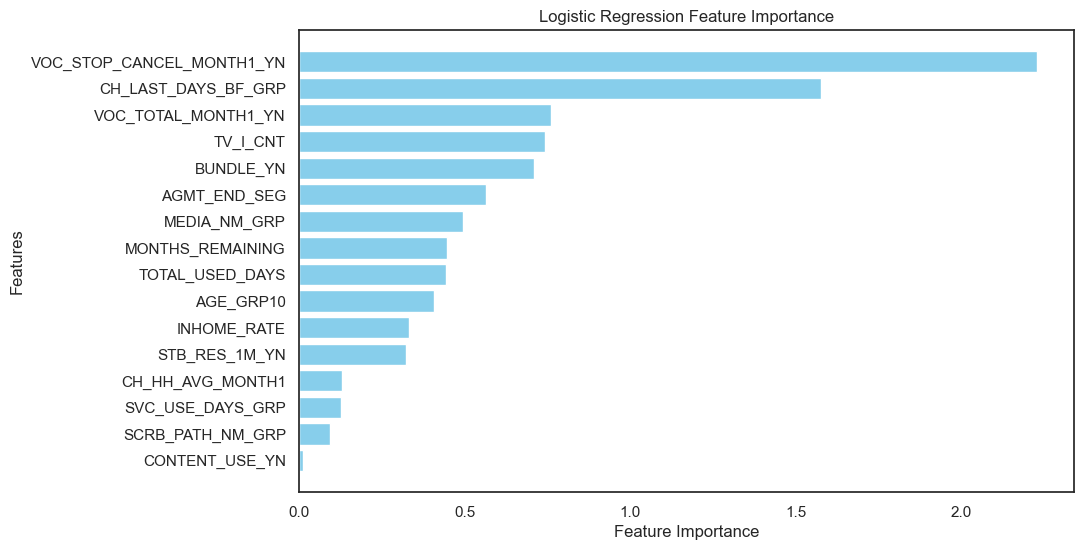

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = np.abs(model.coef_[0])

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 2. LGBM Í∞ÄÏ§ëÏπò

In [73]:
from lightgbm import LGBMClassifier

# ÎèÖÎ¶Ω Î≥ÄÏàò & Ï¢ÖÏÜç Î≥ÄÏàò ÏÑ§Ï†ï
X_train = train.drop(columns=['churn'])  # ÎèÖÎ¶Ω Î≥ÄÏàò
y_train = train['churn']  # Ï¢ÖÏÜç Î≥ÄÏàò

# LightGBM Î™®Îç∏ ÏÉùÏÑ±
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    class_weight='balanced',  # ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Ï†ÅÏö©
    random_state=42 
)

# Î™®Îç∏ ÌïôÏäµ
lgbm_model.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', random_state=42)

Test Accuracy: 0.81

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932416
           1       0.03      0.74      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.77      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1565139  367277]
 [   3454    9722]]


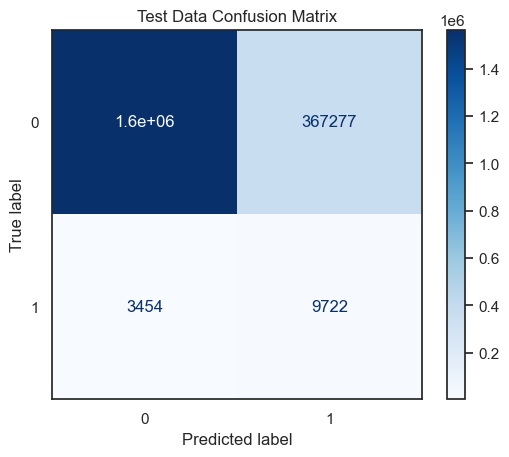

Test AUC-ROC: 0.85


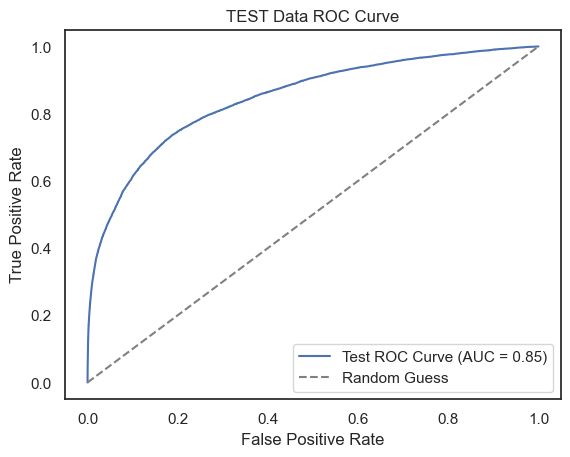

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = lgbm_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=lgbm_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = lgbm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

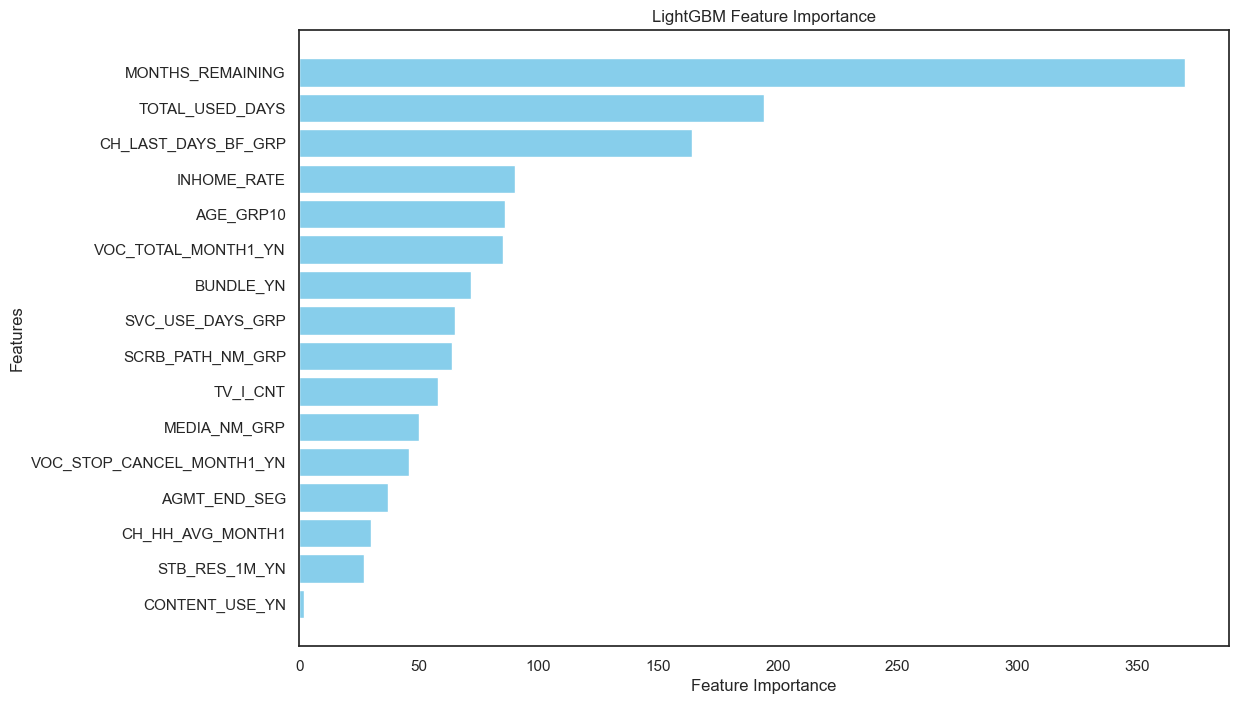

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance Ï∂îÏ∂ú
feature_importance = lgbm_model.feature_importances_

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

Î™®Îç∏ÎßÅ Í≤∞Í≥º, <BR><BR>

**Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÎûúÎç§Ïñ∏Îçî FE** > Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÎûúÎç§Ïñ∏Îçî FE 2   
**ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÎûúÎç§Ïñ∏Îçî FE** > ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÎûúÎç§Ïñ∏Îçî FE 2   
XGB ÎûúÎç§Ïñ∏Îçî FE < **XGB ÎûúÎç§Ïñ∏Îçî FE 2**   
LGBM ÎûúÎç§Ïñ∏Îçî FE < **LGBM ÎûúÎç§Ïñ∏Îçî FE 2**    
CAT ÎûúÎç§Ïñ∏Îçî FE < **CAT ÎûúÎç§Ïñ∏Îçî FE 2**   
**Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Í∞ÄÏ§ëÏπò FE** > Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Í∞ÄÏ§ëÏπò FE 2   
LGBM Í∞ÄÏ§ëÏπò FE < **LGBM Í∞ÄÏ§ëÏπò FE 2**   

Ìï¥Îãπ FeatureÎì§Î°ú Î™®Îç∏ÎßÅÏùÑ ÌñàÏùÑ Ïãú, XGB, LGBM ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Í≤∞Í≥ºÏóêÏÑú Ï¢Ä Îçî ÎÇòÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï§ÄÎã§.<br><br>
Í∑∏Î¶¨Í≥† **LightGBM**, **XGBoost**ÏóêÏÑú Ï†úÏùº Ï¢ãÏùÄ ÏÑ±Îä•Îì§ÏùÑ Î≥¥Ïó¨Ï§ÄÎã§.<br><br>

Ïù¥Ï†ú, Ïó¨Îü¨ Î™®Îç∏Îì§ÏùÑ ÎèåÎ†§Î¥§ÏùÑÎïå, ÏÉÅÏúÑ 7Í∞úÏùò Ïª¨ÎüºÎì§Îßå ÎÇ®Í∏∞Í≥† ÎèåÎ†§Î≥¥Í≤†Îã§.